In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#Read the dataset 
iris=pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<h3>Preprocessing</h3>

In [3]:
iris.shape

(150, 5)

In [4]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
iris.values

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [7]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
y=iris.iloc[:,-1]
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [9]:
X = iris.iloc[:,:4]

In [10]:
X = preprocessing.StandardScaler().fit_transform(X)
print(X[0:4])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]]


<h3>Train & Test Split</h3>

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)
y_test.shape

(45,)

<h3> Training and Predicting </h3>

In [12]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
y_predict1=knnmodel.predict(X_test)

<h3> Finding the value of k</h3>

In [13]:
from sklearn.metrics import accuracy_score
Ks=50
mean_acc=np.zeros((Ks-1))
#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)
mean_acc

array([0.95555556, 0.95555556, 0.97777778, 0.95555556, 0.95555556,
       0.97777778, 0.97777778, 0.97777778, 0.95555556, 0.95555556,
       0.95555556, 0.95555556, 0.95555556, 0.95555556, 0.95555556,
       0.95555556, 0.93333333, 0.95555556, 0.95555556, 0.95555556,
       0.91111111, 0.93333333, 0.91111111, 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.93333333,
       0.93333333, 0.88888889, 0.91111111, 0.91111111, 0.91111111,
       0.91111111, 0.91111111, 0.88888889, 0.86666667, 0.86666667,
       0.86666667, 0.84444444, 0.84444444, 0.8       ])

<h3>Output Visualization</h3>

In [14]:
prediction_output=pd.DataFrame(
    data=[y_test.values,y_predict1],index=['y_test','y_predict1'])

In [15]:
prediction_output.transpose()

,y_test,y_predict1
0,setosa,setosa
1,versicolor,versicolor
2,versicolor,versicolor
3,setosa,setosa
4,virginica,virginica
5,versicolor,versicolor
6,virginica,virginica
7,setosa,setosa
8,setosa,setosa
9,virginica,virginica


In [16]:
prediction_output.iloc[0,:].value_counts()

versicolor    18
setosa        14
virginica     13
Name: y_test, dtype: int64

In [17]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9777777777777777 with k= 3


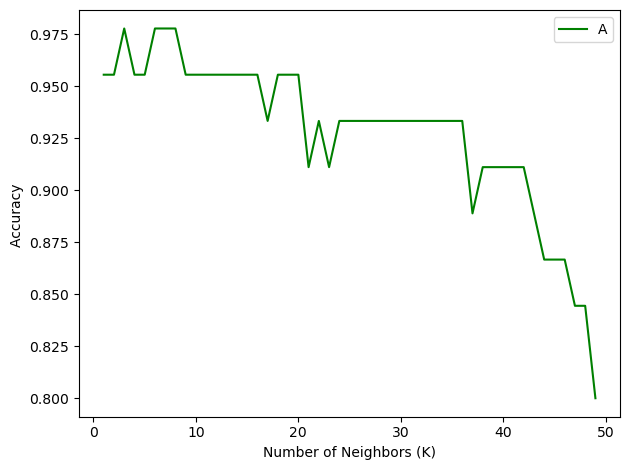

In [18]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

<h3> Accuracy</h3>

In [19]:
acc=accuracy_score(y_test,y_predict1)
acc

0.9777777777777777

<h3> Confusion Matrix</h3>

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values,y_predict1)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

In [21]:
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,18,0
virginica,0,1,12
